# Project: Analysis of data from 10,000 films with user classification and generated revenues.

### Dataset and what questions I intend to answer in this project.

  > In this project I intend to analyze a database of 10,000 films that were evaluated on the tmdb website. The films have user ratings, budgets and production revenues. It includes the names of the actors, directors and producer involved in the project. The main objective of the project is to answer questions and the development of the film industry from the user's point of view. So what are the most popular genres year after year, what are the main features that make movies make the most revenue. In addition, I will try to find more information about the quality of this data set.

### I will import the necessary packages for data analysis, cleaning and repair, below.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Wrangling

> After downloading the packages and reading the txt, I will check the first lines, the number of rows and columns and how statistically the data is grouped. In addition to checking the name of each column, to decide what will make the most sense in the data set. I will use the pandas packages to clean and read the data, numpy to work with arrays, matplotlib and seaborn to generate graphics and visualizations.

### General information

In [2]:
# reading the dataset and viewing the first lines.
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [152]:
# checked the number of rows and columns.
df.shape

(10866, 21)

In [4]:
# with the head function I didn't get a good view of the column names, so use the list function.
# I believe that here I can get a sense of which columns I will discard.
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

## Cleaning Dataset

### My decisions with columns

> Looking at the name of the columns and reading the documentation in kaggle I decided to discard only the 'imdb_id' columns because I understand that they are internal identification column. I believe that it will not make a difference in the final result.

>  I will also exclude the last two columns of revenues and budgets already discounted from inflation, as I understand that they will not influence the answer to the proposed questions. And the popularity column, because it seems to me that it is a measure of the site's own score.

In [3]:
# deleting quia columns will not be necessary.
df.drop(['imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'cast'], axis=1, inplace=True)
df.tail()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
10861,21,0.080598,0,0,The Endless Summer,Bruce Brown,95,Documentary,6/15/66,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,12/21/66,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,1/1/66,11,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,11/2/66,22,5.4,1966
10865,22293,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren,74,Horror,11/15/66,15,1.5,1966


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1018.8+ KB


In [4]:
# checking null values.
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [5]:
# investigating the rows with null values.
df.loc[df['genres'].isnull()]
# seeing the lines with null values, I decided that because it is a small amount compared to the total number of records,
# exclude them. And also because they do not contain values in revenues and budget.

df = df.dropna(subset=['genres'])
# I used this article as a guide to understand how to view and delete null values:
# https://medium.com/horadecodar/como-tratar-dados-nulos-no-dataset-4f0470b22d38

In [6]:
# sem valores nulos
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          42
runtime            0
genres             0
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [7]:
# checked the 'director' column.
# I will insert the information 'not registered'.
df.loc[df['director'].isnull()]
df.update(df['director'].fillna('Not Registered'))

In [8]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [9]:
# here I understand that the column 'release_date' is transformed into a date format.
df['release_date'] = pd.to_datetime(df.release_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10843 non-null  int64         
 1   popularity      10843 non-null  float64       
 2   budget          10843 non-null  int64         
 3   revenue         10843 non-null  int64         
 4   original_title  10843 non-null  object        
 5   director        10843 non-null  object        
 6   runtime         10843 non-null  int64         
 7   genres          10843 non-null  object        
 8   release_date    10843 non-null  datetime64[ns]
 9   vote_count      10843 non-null  int64         
 10  vote_average    10843 non-null  float64       
 11  release_year    10843 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [10]:
# I understand that turning the column into a date format can be useful if there is any correlation of
# the month with large revenues.
df['release_date'].head(1)

0   2015-06-09
Name: release_date, dtype: datetime64[ns]

In [11]:
# now i will check for duplicate values and if this is significant for doing some kind of treatment.
sum(df.duplicated())

1

In [12]:
# checked what this record is.
df.loc[df.duplicated()]

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
2090,42194,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010


In [13]:
# confirming duplicate registration.
df.loc[df['original_title'] == 'TEKKEN']

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
2089,42194,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010
2090,42194,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010


In [14]:
# I will delete it.
# we had 10843 records, now 10842.
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10842 non-null  int64         
 1   popularity      10842 non-null  float64       
 2   budget          10842 non-null  int64         
 3   revenue         10842 non-null  int64         
 4   original_title  10842 non-null  object        
 5   director        10842 non-null  object        
 6   runtime         10842 non-null  int64         
 7   genres          10842 non-null  object        
 8   release_date    10842 non-null  datetime64[ns]
 9   vote_count      10842 non-null  int64         
 10  vote_average    10842 non-null  float64       
 11  release_year    10842 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [18]:
# main statistical data averages.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000
mean,65870.675521,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794
std,91981.355752,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10589.250000,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20557.000000,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75186.000000,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [19]:
# finding and counting all '0' values in budget, revenue and runtime
(df[['budget','revenue','runtime']] == 0).sum()

budget     5674
revenue    5993
runtime      30
dtype: int64

> Analyzing the descriptive statistical data, it is noted that the budget, revenue and runtime variables have minimum values equal to zero. My idea was to count how many records contain zero values to determine whether I would treat that data with some null value technique. The budget and revenue variables contain many records with values equal to zero, approximately half of the records, to be more precise, 5674 and 5,993 lines, respectively. The runtime contains only 30 lines, which is already a more interesting number to make such a treatment, and I decide to use fashion. I believe that treating the budget and revenue variables will bias the data, so I decide not to do it.

In [20]:
# turning the values 0 into nan
df['runtime'] = df['runtime'].replace(0,np.NAN)

In [21]:
# counting nan values
df['runtime'].isnull().sum()

30

In [22]:
# applying mode to nan values, which were previously 0
mode = df['runtime'].mode()
# the mode for the runtime is equal to 90
df['runtime'] = df['runtime'].fillna(int(mode))
df[['budget', 'revenue', 'runtime']].describe()

,budget,revenue,runtime
count,1.084200e+04,1.084200e+04,10842.000000
mean,1.465531e+07,3.991138e+07,102.387475
std,3.093971e+07,1.171179e+08,30.835524
min,0.000000e+00,0.000000e+00,2.000000
25%,0.000000e+00,0.000000e+00,90.000000
50%,0.000000e+00,0.000000e+00,99.000000
75%,1.500000e+07,2.414118e+07,111.000000
max,4.250000e+08,2.781506e+09,900.000000


In [23]:
# checking if the runtime contains null values
df['runtime'].isnull().sum()

0

> In this part of data cleaning I decided to stick to the variables that I believe are relevant in relation to the recipes. I looked for duplicate data, missing data, data types and finally the main statistical averages of quantitative data. The average of the popularity data was 0.6 and 75% of them was 0.71 which says that 32.9 as a maximum number is definitely an extreme value. I will probably treat this variable with the median in future analyzes. There are distant values also in the vote_count and runtime variables. Vote_average has an average of 5.9, slightly distant from the maximum value of 9.2. Once again, I will possibly deal with the median that is 6. The titles have an average of 102 minutes and 75% of them performed in 2011. The budget, revenue and runtime variables were zero. I counted the records of each one, and decided to treat only the runtime, since it was a very small number (30 lines). In order not to interfere with budget and revenue, I will leave them as they are, because the number of lines equal to zero corresponds to approximately half of the data.

## Exploratory Data Analysis

> After cleaning and understanding the meaning of your variables, the next step is to explore and understand it. The main objective is to verify which variables directly impact movie revenues. Or rather, which variables are important for this. To explore the data I will plot some statistical graphs, because I understand that graph visualization is more intuitive.

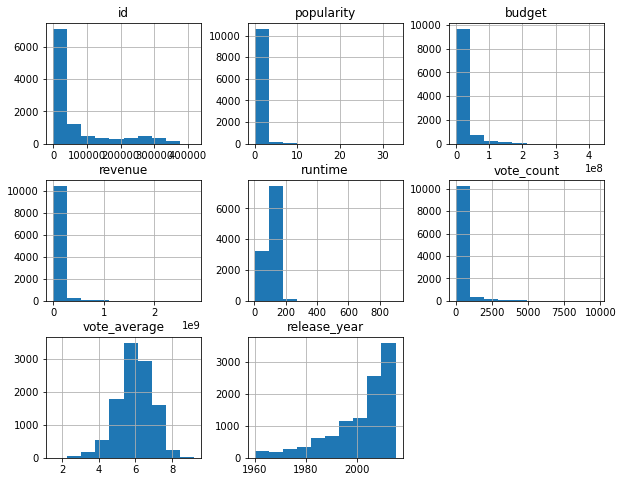

In [24]:
# I decided to plot histograms to better visualize the data layout.
df.hist(figsize=(10,8));

> Selling the histograms for each quantitative variable, I notice that with the exception of 'vote_average' and 'release_year' they are all skewed to the right indicating that the average will be relatively higher than the median. An indication for using medians in the data.

### Analyzing revenues with 'vote_count', 'popularity' ,  'runtime' and 'budget.

> From here I will start by analyzing the runtime, vote_count and popularity variables to identify which ones influence high revenues in some way.

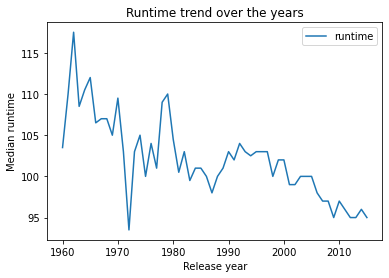

In [25]:
# 'runtime' over time.
df.groupby(['release_year']).agg({'runtime': 'median'}).plot();
plt.xlabel('Release year')
plt.ylabel('Median runtime')
plt.title('Runtime trend over the years')
plt.show()
# the median time of films has been decreasing over the years.

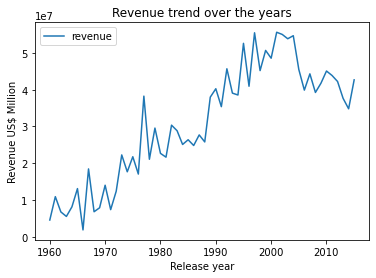

In [26]:
# 'revenue' over time.
df.groupby(['release_year']).agg({'revenue': 'mean'}).plot();
plt.xlabel('Release year')
plt.ylabel('Revenue US$ Million')
plt.title('Revenue trend over the years')
plt.show()
# the median revenue for films has been increasing over the years.

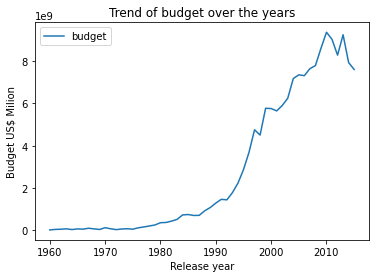

In [27]:
df.groupby(['release_year']).agg({'budget': 'sum'}).plot();
plt.xlabel('Release year')
plt.ylabel('Budget US$ Milion')
plt.title('Trend of budget over the years')
plt.show()

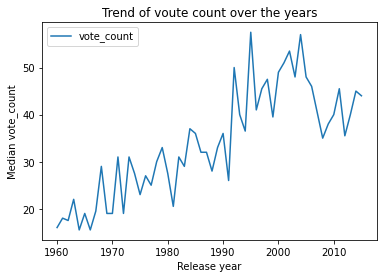

In [28]:
# 'voue_count' over time.
df.groupby(['release_year']).agg({'vote_count': 'median'}).plot();
plt.xlabel('Release year')
plt.ylabel('Median vote_count')
plt.title('Trend of voute count over the years')
plt.show()
# median votes have been increasing over the years

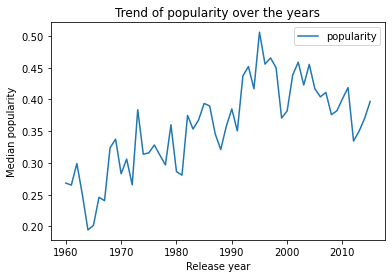

In [29]:
# popularity has also increased over the years.
df.groupby(['release_year']).agg({'popularity': 'median'}).plot();
plt.xlabel('Release year')
plt.ylabel('Median popularity')
plt.title('Trend of popularity over the years')
plt.show()

> Analyzing the graphs above with the exception of runtime, all other variables have increased significantly over the years. I highlight the budget that has grown exponentially until 2010. Revenues continued to grow, however in the mid-2000s they fell. Vote_count and popularity have also grown over the years, falling as well, in the early 2000s.

In [30]:
year_count = df.groupby('release_year').agg({'original_title': 'count'}).sort_values('original_title', ascending=False)
year_count.head(10)

,original_title
release_year,
2014,699
2013,656
2015,627
2012,584
2011,540
2009,531
2008,495
2010,487
2007,438


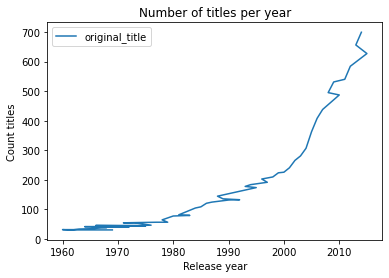

In [31]:
# checking the amount of films released over time
year_count.plot();
plt.xlabel('Release year')
plt.ylabel('Count titles')
plt.title('Number of titles per year')
plt.show()

> It is clear that over time many more films have been released, mainly in this century, compared to the last century. 2014 was the launching champion with 699 films followed by 2013 with 656.

## Directors with better revenue and profit performance

In this section I intend to understand the data of directors and search for what has the best performance in revenue over the years, best profits and if, each one was a product, which will be the best average ticket.

In [32]:
# chamando split, explode and head
df_director = df.assign(director=df.director.str.split("|")).explode('director')
df_director.head(6)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015
5,281957,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.0,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015


In [33]:
df_director.groupby(['director']).agg({'budget': 'sum', 'revenue': 'sum',
                                       'vote_average': 'mean'}).sort_values('revenue', ascending=False).head(20).head(10)
# calling the gtoupby () function to check the 'director' variable with 'revenue' across the sample

,budget,revenue,vote_average
director,,,
Steven Spielberg,1599950000,9048014691,6.796667
Peter Jackson,1326775710,6523244659,6.885714
James Cameron,760045786,5841894863,6.810000
Michael Bay,1360000000,4917208171,6.327273
Christopher Nolan,1005000000,4167548502,7.470000
David Yates,775000000,4154295625,7.140000
Robert Zemeckis,1025700000,3869690869,6.705882
Chris Columbus,627000000,3851491668,6.400000
Tim Burton,1153060000,3782609685,6.660000


In [34]:
# # I want to group the director variable with some other variables
df_director = df.groupby(['director']).agg({'director':'count', 'budget': 'sum', 'revenue': 'sum', 'vote_average': 'median'}).sort_values('revenue', ascending=False)
df_director.describe()

,director,budget,revenue,vote_average
count,5057.000000,5.057000e+03,5.057000e+03,5057.000000
mean,2.143959,3.142038e+07,8.556837e+07,5.896668
std,2.587366,1.013761e+08,3.517073e+08,0.929590
min,1.000000,0.000000e+00,0.000000e+00,1.500000
25%,1.000000,0.000000e+00,0.000000e+00,5.350000
50%,1.000000,0.000000e+00,0.000000e+00,5.950000
75%,2.000000,1.560000e+07,1.941299e+07,6.500000
max,45.000000,1.589950e+09,9.018564e+09,9.200000


In [35]:
# # I will work with a sample, that is, the 75% bigger in relation to the revenues
df_director = df_director.query('revenue >= 1.941299')
df_director.head()

,director,budget,revenue,vote_average
director,,,,
Steven Spielberg,29,1589950000,9018563772,6.90
Peter Jackson,13,1326775710,6523244659,6.90
James Cameron,9,760045786,5841894863,7.10
Michael Bay,11,1360000000,4917208171,6.40
Christopher Nolan,10,1005000000,4167548502,7.65


In [36]:
# in this sample only 27 directors appear
df_director.director.nunique()

27

In [37]:
# If each of the 27 directors was a product, what would be the average ticket for each one. Which would be the most valuable
df_director['profit'] = df_director.revenue - df_director.budget
df_director['average_ticket'] = df_director.revenue / df_director.director
df_director.head(15).sort_values(by='average_ticket', ascending=False)

,director,budget,revenue,vote_average,profit,average_ticket
director,,,,,,
David Yates,5,775000000,4154295625,7.30,3379295625,8.308591e+08
J.J. Abrams,5,740000000,3579169916,7.30,2839169916,7.158340e+08
James Cameron,9,760045786,5841894863,7.10,5081849077,6.490994e+08
George Lucas,6,360554000,3316550893,6.45,2955996893,5.527585e+08
Peter Jackson,13,1326775710,6523244659,6.90,5196468949,5.017881e+08
Michael Bay,11,1360000000,4917208171,6.40,3557208171,4.470189e+08
Christopher Nolan,10,1005000000,4167548502,7.65,3162548502,4.167549e+08
Gore Verbinski,9,1193000000,3548779679,6.40,2355779679,3.943089e+08
Steven Spielberg,29,1589950000,9018563772,6.90,7428613772,3.109850e+08


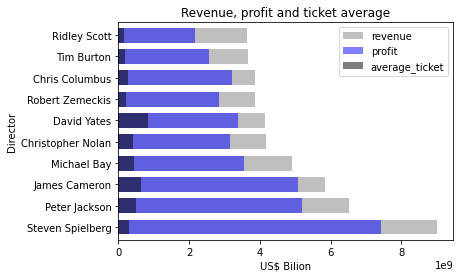

In [38]:
# # viewing results of revenue, profits and average ticket per director

df_director.revenue.head(10).plot(kind='barh', alpha=0.5, color='grey', width=0.7);
df_director.profit.head(10).plot(kind='barh', alpha=0.5, color='blue', width=0.7);
df_director.average_ticket.head(10).plot(kind='barh', alpha=0.5, color='black', width=0.7);
plt.legend();
plt.title('Revenue, profit and ticket average')
plt.xlabel('US$ Bilion')
plt.ylabel('Director')
plt.show()

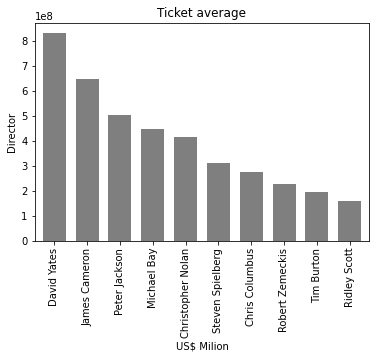

In [39]:
# chart shows the best directors by average ticket.

df_director.average_ticket.head(10).sort_values(ascending=False).plot(kind='bar', alpha=0.5, color='black', width=0.7);
plt.title('Ticket average')
plt.xlabel('US$ Milion')
plt.ylabel('Director')
plt.show()

In [40]:
# the 10 directors with the best average votes

df_director_vote = df_director.vote_average.head(10).sort_values(ascending=False)
df_director_vote

director
Christopher Nolan    7.65
David Yates          7.30
James Cameron        7.10
Peter Jackson        6.90
Steven Spielberg     6.90
Robert Zemeckis      6.80
Tim Burton           6.60
Chris Columbus       6.60
Michael Bay          6.40
Ridley Scott         6.30
Name: vote_average, dtype: float64

> In this section I wanted to analyze who were the best directors, but not only from the perspective of profit and revenue, but also by the average ticket and vote_average. Steven Spielberg has the best revenue and profit indicators and needs little budget to do so. However, it needs a lot of films to reach these high indicators, 29 in total. If we look at the average ticket we see David Yates and James Cameron leading, since they need to make fewer films to bring in higher revenues. They needed 5 and 9 films respectively. On the other hand in vote_average, the user's champion of taste is Christopher Nolan with an average of 7.65, followed by David Yates with 7.3.

## Which titles generated the most revenue and profits?

In this section I will try to understand the most profitable films and with the best profit, revenue and budget / profit ratio performances.

In [41]:
# slicing the data by titles and placing it in a variable.
df_title = df.groupby(['original_title']).agg({'budget': 'sum', 'revenue': 'sum'}).sort_values('revenue', ascending=False)
df_title['profit'] = df_title.revenue - df_title.budget
df_title.head()

,budget,revenue,profit
original_title,,,
Avatar,237000000,2781505847,2544505847
Star Wars: The Force Awakens,200000000,2068178225,1868178225
Titanic,213000000,1845034188,1632034188
The Avengers,280000000,1568080742,1288080742
Jurassic World,150000000,1513528810,1363528810


In [42]:
df_title.describe()

,budget,revenue,profit
count,1.054800e+04,1.054800e+04,1.054800e+04
mean,1.506379e+07,4.102382e+07,2.596003e+07
std,3.161280e+07,1.192160e+08,9.821163e+07
min,0.000000e+00,0.000000e+00,-4.139124e+08
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.600000e+07,2.524643e+07,1.012467e+07
max,4.250000e+08,2.781506e+09,2.544506e+09


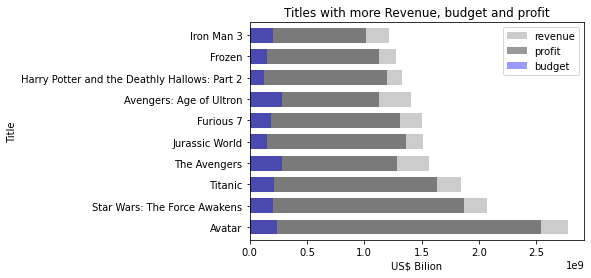

In [43]:
# chart of the 10 best titles with the highest revenue.
# The chart also shows the budget and profits for these bonds.
df_title.revenue.head(10).plot(kind='barh', alpha=0.4, color='grey', width=0.7);
df_title.profit.head(10).plot(kind='barh', alpha=0.4, color='black', width=0.7);
df_title.budget.head(10).plot(kind='barh', alpha=0.4, color='blue', width=0.7);
plt.legend();
plt.xlabel('US$ Bilion')
plt.ylabel('Title')
plt.title('Titles with more Revenue, budget and profit')
plt.show()

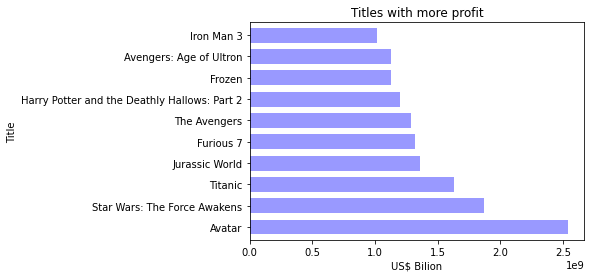

In [44]:
# I will check if in terms of profit, what were the best films.
df_title.profit.head(10).sort_values(ascending=False).plot(kind='barh', alpha=0.4, color='blue', width=0.7);
plt.xlabel('US$ Bilion')
plt.ylabel('Title');
plt.title('Titles with more profit')
plt.show()

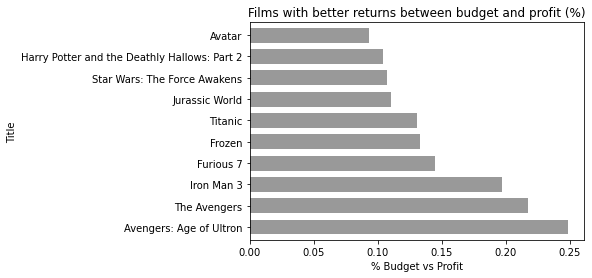

In [45]:
# I want to check the budget and profit ratio, which had the best performance.
df_title['budget_profit'] = df_title.budget / df_title.profit
df_title.head(10).sort_values('budget_profit', ascending=False)
df_title.budget_profit.head(10).sort_values(ascending=False).plot(kind='barh', alpha=0.4, color='black', width=0.7);
plt.xlabel('% Budget vs Profit')
plt.ylabel('Title');
plt.title('Films with better returns between budget and profit (%)')
plt.show()

> Through the graphics, clearly the film Avatar was the film that most profited, and it was also the film with the highest revenue in the sample. It is worth mentioning the third graphic in which the relationship between profit and budget, the movie Avengers: age of ultron had the best performance. I also highlight the results of the top 10 have changed a lot from the perspective of budget vs profit. This means that the net return invested is higher in (%) on this graph.

## In this section I will separate the indicators of revenues, budgets and profits by century.

I intend to verify that in this century the indicators of revenues, budgets and profits are higher than the last century. This will give us an idea if the film industry has been investing more money in the segment.

In [46]:
df_year = df.groupby(['release_year']).agg({'budget': 'sum', 'revenue': 'sum', 'popularity': 'median'})
df_year['profit'] = df_year.revenue - df_year.budget
df_year.head()

,budget,revenue,popularity,profit
release_year,,,,
1960,22056948,145005000,0.268273,122948052
1961,46137000,337720188,0.265092,291583188
1962,54722126,215579846,0.299075,160857720
1963,73331500,187404989,0.249940,114073489
1964,39483161,340981782,0.194472,301498621


In [47]:
df_1900 = df_year.query('release_year < 2000')
df_1900.head()

,budget,revenue,popularity,profit
release_year,,,,
1960,22056948,145005000,0.268273,122948052
1961,46137000,337720188,0.265092,291583188
1962,54722126,215579846,0.299075,160857720
1963,73331500,187404989,0.249940,114073489
1964,39483161,340981782,0.194472,301498621


In [48]:
df_1900.sum()

budget        3.812918e+10
revenue       1.218184e+11
popularity    1.355240e+01
profit        8.368918e+10
dtype: float64

In [49]:
df_2000 = df_year.query('release_year >= 2000')
df_2000.head()

,budget,revenue,popularity,profit
release_year,,,,
2000,5752700000,10978701012,0.381856,5226001012
2001,5641944000,13410083139,0.438395,7768139139
2002,5894640255,14643618528,0.458767,8748978273
2003,6239857694,15138243542,0.422711,8898385848
2004,7170340222,16793822618,0.455263,9623482396


In [50]:
df_2000.sum()

budget        1.207637e+11
revenue       3.109009e+11
popularity    6.418792e+00
profit        1.901372e+11
dtype: float64

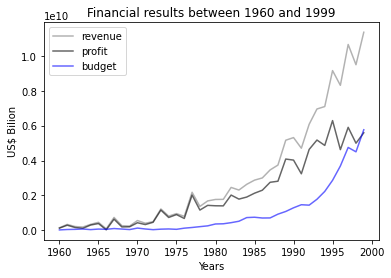

In [51]:
# # comparativo de receitas, orçamentos e lucros no século passado
df_1900.revenue.plot(alpha=0.6, color='grey');
df_1900.profit.plot(alpha=0.6, color='black');
df_1900.budget.plot(alpha=0.6, color='blue');
plt.legend();
plt.xlabel('Years')
plt.ylabel('US$ Bilion');
plt.title('Financial results between 1960 and 1999')
plt.gcf().set_size_inches(6, 4)
plt.show()

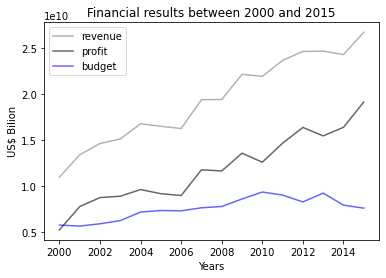

In [52]:
# comparativo de receitas, orçamentos e lucros neste século
df_2000.revenue.plot(alpha=0.6, color='grey');
df_2000.profit.plot(alpha=0.6, color='black');
df_2000.budget.plot(alpha=0.6, color='blue');
plt.legend();
plt.xlabel('Years')
plt.title('Financial results between 2000 and 2015')
plt.ylabel('US$ Bilion');
plt.show()

> Nota-se que independente dos séculos, as receitas e lucros vem aumentando exponencialmente. Embora os orçamentos tenham aumentado significativamente neste século. 

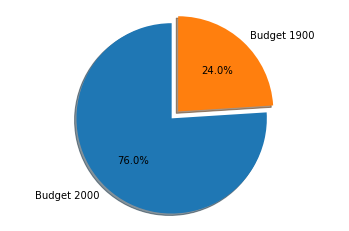

In [53]:
(df_2000.budget.sum(), df_1900.budget.sum())

labels = 'Budget 2000', 'Budget 1900'
fig1, ax1 = plt.subplots()
explode = (0.1, 0)
ax1.pie((df_2000.budget.sum(), df_1900.budget.sum()), labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90, explode=explode)
ax1.axis('equal')
plt.show()

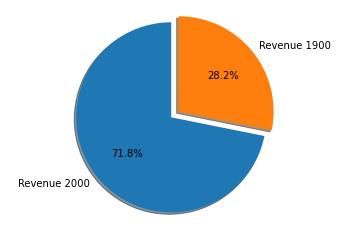

In [54]:
(df_2000.revenue.sum(), df_1900.revenue.sum())

labels = 'Revenue 2000', 'Revenue 1900'
fig1, ax1 = plt.subplots()
explode = (0.1, 0)
ax1.pie((df_2000.revenue.sum(), df_1900.revenue.sum()), labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90, explode=explode)
ax1.axis('equal')
plt.show()

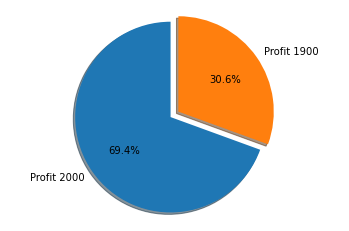

In [55]:
(df_2000.profit.sum(), df_1900.profit.sum())

labels = 'Profit 2000', 'Profit 1900'
fig1, ax1 = plt.subplots()
explode = (0.1, 0)
ax1.pie((df_2000.profit.sum(), df_1900.profit.sum()), labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90, explode=explode)
ax1.axis('equal')
plt.show()

> According to post-century analyzes, it is clear that there has been a significant increase in money in the three indicators surveyed in this section. The 2000s saw a clear increase in investments and revenues, although this has been happening since the 1960s.

### Checked the launch month with the receipts, and if there is a better month for launching the films

With the analysis of the months of releases, I intend to understand if there are any relevant months for movie releases in terms of revenues. And also the least profitable months through that data set.

In [56]:
# call the function head()
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [57]:
# I intend to understand if there is any relationship with the launch month and revenues
# for this I will need to create a column with the months of the year
# I followed the tutorial below to do it
# https://qastack.com.br/programming/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
df['month'] = pd.DatetimeIndex(df['release_date']).month
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,month
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,6
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,5
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,3
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,12
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,4


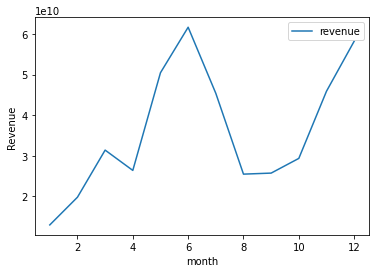

In [58]:
# plotting the months with the highest revenue over the years.
df.groupby('month').agg({'revenue': 'sum'}).plot();
plt.ylabel('Revenue')
plt.show()

In [59]:
# including the profit column
df_month = df.groupby(['month']).agg({'budget': 'sum', 'revenue': 'sum'})
df_month['profit'] = df_month.revenue - df_month.budget
df_month.head(12)

,budget,revenue,profit
month,,,
1,6260321862,12968479332,6708157470
2,9263627747,19793785507,10530157760
3,12105714749,31394946991,19289232242
4,10557491376,26393260672,15835769296
5,16012199287,50454865815,34442666528
6,18002521931,61660585217,43658063286
7,15296179720,45382225481,30086045761
8,11095258000,25477766900,14382508900
9,12435245114,25731480293,13296235179


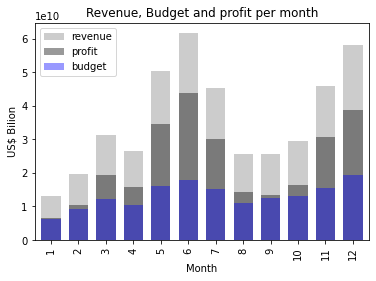

In [60]:
# bar plot to check revenues, budgets and profits to check the best months of launches.

df_month.revenue.plot(kind='bar', alpha=0.4, color='grey', width=0.7)
df_month.profit.plot(kind='bar', alpha=0.4, color='black', width=0.7)
df_month.budget.plot(kind='bar', alpha=0.4, color='blue', width=0.7)
plt.title('Revenue, Budget and profit per month')
plt.legend()
plt.xlabel('Month')
plt.ylabel('US$ Bilion')
plt.show();

> Analyzing the revenue data with the launch months, it is clear that the middle of the year, like May, July and July has the best performances, as well as November and December. The months of June and December presented the best performances in terms of revenues and profits. January being the month with the worst performance in terms of revenues based on the launch months.

### Question 1: Which genres are most popular from year to year?

In [61]:
# To start analyzing recipes by genres of films, I will use the split () and explode () functions, 
# since many films have more than one genre in their records. The purpose of the split will be to separate the
# genres of each record, and explode it to create new lines.
# Eu li e utilizai o tutorial abaixo para desenvolvê-lo.
# https://cmdlinetips.com/2020/06/pandas-explode-convert-list-like-column-elements-to-separate-rows/#:~:text=Pandas%20explode()%20function%20will,and%20also%20corresponding%20Language%20element.
df_genres = df.assign(genres=df.genres.str.split("|")).explode('genres')
df_genres.head(6)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,month
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124.0,Action,2015-06-09,5562,6.5,2015,6
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124.0,Adventure,2015-06-09,5562,6.5,2015,6
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124.0,Science Fiction,2015-06-09,5562,6.5,2015,6
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124.0,Thriller,2015-06-09,5562,6.5,2015,6
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120.0,Action,2015-05-13,6185,7.1,2015,5
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120.0,Adventure,2015-05-13,6185,7.1,2015,5


In [62]:
# after viewing the popularity statistical data, the extreme values will impact the average popularity of each genre.
# I will use the median for the column and find out which film genre is most popular each year.
# there are 56 years of films being scored, and 20 genres.
# I decided to use the pivot_table function to slice the information I needed, I sought information from the link below.
# https://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/pandas/03.09-Pivot-Tables.ipynb
popularity_year = df_genres.pivot_table(index='genres', columns='release_year', aggfunc={'popularity':'median'}).fillna(0.0)
popularity_year.head(20)

popularity                                                    \
release_year          1960      1961      1962      1963      1964      1965   
genres                                                                         
Action            0.288758  0.307820  0.400881  0.545760  0.275530  0.243896   
Adventure         0.465879  0.473274  0.526108  0.501540  0.131149  0.323553   
Animation         0.000000  2.631987  0.000000  2.180410  0.445746  0.600975   
Comedy            0.307729  0.297034  0.235542  0.250451  0.233366  0.250043   
Crime             0.346480  0.806519  0.341718  0.666707  0.179561  0.387277   
Documentary       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Drama             0.271858  0.286475  0.275157  0.207161  0.198251  0.180334   
Family            0.254124  0.303783  0.323463  0.198774  0.665686  0.600975   
Fantasy           0.428247  0.154073  0.235542  0.214071  0.177050  0.000000   
Foreign           0.194948  0.113651  0.235542  0.351647  0.152209  0.004770   
History           0.256779  0.307820  0.499359  0.457388  0.306872  0.153438   
Horror            0.323180  0.249542  0.153654  0.249429  0.156153  0.102242   
Music             0.423531  0.564749  0.323933  0.000000  0.633882  0.968850   
Mystery           0.000000  0.712793  0.145373  0.418616  0.276721  0.127948   
Romance           0.551315  0.242244  0.235542  0.232738  0.182922  0.250043   
Science Fiction   0.144106  0.226185  0.179212  0.467836  0.186013  0.101956   
TV Movie          0.000000  0.000000  0.000000  0.000000  0.000000  0.600975   
Thriller          0.496477  0.000000  0.341718  0.614625  0.275530  0.201703   
War               0.225863  0.531184  0.232756  0.664326  0.306872  0.192952   
Western           0.289913  0.173731  0.507078  0.246957  0.127679  0.166249   

                                                         ...            \
release_year         1966      1967      1968      1969  ...      2006   
genres                                                   ...             
Action           0.272052  0.438314  0.297820  0.399297  ...  0.467333   
Adventure        0.291704  0.485288  0.569422  0.615889  ...  0.523882   
Animation        0.276133  1.348805  0.202802  0.345405  ...  0.523882   
Comedy           0.233486  0.201545  0.259501  0.318256  ...  0.440529   
Crime            0.206537  0.438314  0.488336  0.897684  ...  0.437529   
Documentary      0.080598  0.095101  0.000000  0.000000  ...  0.157645   
Drama            0.295808  0.329598  0.347755  0.411816  ...  0.386756   
Family           0.276133  0.241283  0.323826  0.371046  ...  0.565930   
Fantasy          0.424771  0.225687  0.323826  0.204098  ...  0.528154   
Foreign          0.361556  0.000000  0.000000  0.000000  ...  0.244049   
History          0.335649  0.000000  0.569422  0.575000  ...  0.577804   
Horror           0.035919  0.242839  0.523209  0.141028  ...  0.307369   
Music            0.000000  0.114034  0.633129  0.404251  ...  0.324740   
Mystery          0.171749  0.428652  1.022050  0.567962  ...  0.480704   
Romance          0.269673  0.213291  0.211473  0.303721  ...  0.420303   
Science Fiction  0.221678  0.164469  1.010064  0.141056  ...  0.375790   
TV Movie         0.000000  0.000000  0.000000  0.528660  ...  0.276653   
Thriller         0.280317  0.502062  0.488336  0.567962  ...  0.392750   
War              0.295808  0.485288  0.272751  0.224638  ...  0.501431   
Western          0.230873  0.189740  0.621202  0.386778  ...  0.463068   

                                                                             \
release_year         2007      2008      2009      2010      2011      2012   
genres                                                                        
Action           0.463461  0.480116  0.427314  0.559371  0.559451  0.526637   
Adventure        0.494212  0.634256  0.564938  0.757082  0.614537  0.628254   
Animation        0.455415  0.540913  0.460035  0.408510  0.642933  0.424196  

In [63]:
# with the idmxmax () function I can find the highest value of the popularity median by year and by gender.
popularity_year = popularity_year['popularity'].idxmax()
popularity_year
# According to the table above, 1960, for example, the romance genre had the highest median.

release_year
1960            Romance
1961          Animation
1962          Adventure
1963          Animation
1964             Family
1965              Music
1966            Fantasy
1967          Animation
1968            Mystery
1969              Crime
1970          Animation
1971             Family
1972            Romance
1973    Science Fiction
1974            Mystery
1975                War
1976            History
1977          Animation
1978              Crime
1979             Action
1980           TV Movie
1981          Animation
1982                War
1983            History
1984          Animation
1985                War
1986          Adventure
1987            History
1988              Crime
1989                War
1990                War
1991          Animation
1992                War
1993            Fantasy
1994          Animation
1995          Animation
1996              Crime
1997    Science Fiction
1998            Western
1999            Mystery
2000          Adventure
200

> To answer the question I used some functions like explode (), split (), pivot_table () and groupby (). I understood that the best statistical measure to arrive at the ideal result would be the median. After I have grouped all genders by year, I need to extract the highest median from the corresponding record. So I found the idxmax () function for that.

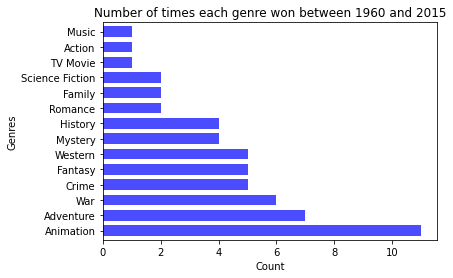

In [64]:
# conforme os resultados abaixo, o gênero 'animation' é o gênero que mais vezes apareceu a cada ano.
popularity_year.value_counts().plot(kind='barh', xlabel='Genres', ylabel='Count', color='blue', alpha=0.7, width=0.7);
plt.title('Number of times each genre won between 1960 and 2015');
plt.xlabel('Count')
plt.show()

> Above we can see the most popular genres year after year. Finally, I wanted to identify how many times each champion genre has appeared in the past 56 years. Clearly the genre 'animation' has appeared as the most popular genre over the years, 11 times. Followed by 'adventure' with 7 appearances.

#### Question 2: What kinds of properties are associated with movies that have high revenues?

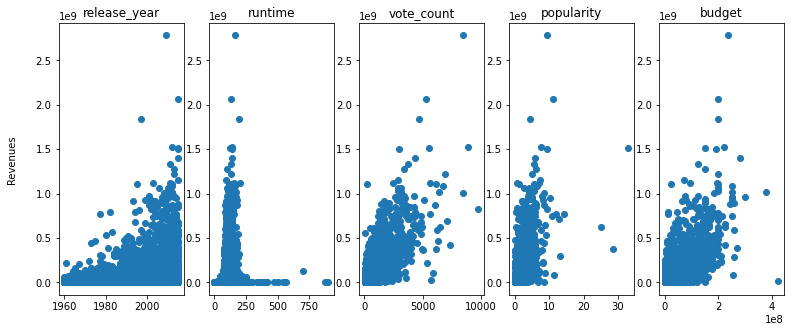

In [65]:
# First I will plot several scatter plots between revenue and some variables.
# I want to understand which ones impact revenues over time.

%matplotlib inline

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(13,5))

ax1.scatter(x="release_year", y="revenue", data=df)
ax2.scatter(x="runtime", y="revenue", data=df)
ax3.scatter(x="vote_count", y="revenue", data=df)
ax4.scatter(x="popularity", y="revenue", data=df)
ax5.scatter(x="budget", y="revenue", data=df)

ax1.set_title('release_year');
ax2.set_title('runtime');
ax3.set_title('vote_count');
ax4.set_title('popularity');
ax5.set_title('budget');

fig.text(0.07, 0.5, 'Revenues', va='center', rotation='vertical');

plt.show();

In [66]:
# calling pandas' corr () function to obtain the correlation of variables with revenue
df[['revenue', 'release_year', 'month', 'budget', 'popularity', 'vote_count']].corr()

,revenue,release_year,month,budget,popularity,vote_count
revenue,1.000000,0.057324,0.038930,0.734851,0.663268,0.791122
release_year,0.057324,1.000000,-0.047945,0.116312,0.090200,0.108275
month,0.038930,-0.047945,1.000000,0.040945,0.043311,0.026303
budget,0.734851,0.116312,0.040945,1.000000,0.545271,0.632601
popularity,0.663268,0.090200,0.043311,0.545271,1.000000,0.800786
vote_count,0.791122,0.108275,0.026303,0.632601,0.800786,1.000000


> After plotting scatter plots as a way to understand the direction of revenue with the variable release_year, runtime, vote_count, popularity, month and budget, I discarded the runtime because I understand that the most profitable films are concentrated in up to 200 minutes. Then I created a correlation matrix with the corr () function of pandas, to see statistically the variables that are most associated with high revenues. Through the table it is noted that release_year and month have no correlation, being 5% and 3% respectively. Budget, popularity and vote_count have a high correlation, 73%, 66% and 79% respectively.

## Conclusions

In the first section I tried to analyze the trends of some variables over time. The runtime variable was the only one with a drop, although this is not correlated with high revenues. In all sections I tried to identify which variables could have an impact on revenues.

Analyzing the data set, I could see how much the financial results increased, both in revenues, budgets and profits in this century.
Then I analyzed the best titles and directors in terms of revenue, as well as their vote_average.

Finally, the goal was to find out which genres performed better compared to their popularity, and wanted analyzed variables to have some impact on the titles' revenues.

## Limitations

The limitations around the data set were many. In the first section I was in doubt about the origin of the popularity values. I don't really know how it was calculated. It is probably a measure of the tmdb website itself.

Another limiting factor is to identify the decimal places of revenues and budgets, which visually disturbs a little.
Even using the median as the central mean, there were many extreme values in the data. Mainly in popularity and vote_count.

Another limitation that I had to decide whether or not to deal with, were the values equal to zero of the budget and revenue variables, because treating them would cause bias in the results, due to the amount of records with this characteristic. In the end I decided to leave them that way, since it would cause distortions in the final result.

Analyzing gender data was a big challenge, because if I hadn't created an alternative dataset I wouldn't have been able to. It was impossible to analyze it by recipes.

Although in the last section I found some correlation between recipes and other variables, I cannot say that there is causality.

## Reeferences

https://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/pandas/03.09-Pivot-Tables.ipynb

https://cmdlinetips.com/2020/06/pandas-explode-convert-list-like-column-elements-to-separate-rows/#:~:text=Pandas%20explode()%20function%20will,and%20also%20corresponding%20Language%20element.

https://medium.com/horadecodar/como-tratar-dados-nulos-no-dataset-4f0470b22d38

https://qastack.com.br/programming/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

## Function created

Many times during the analysis I needed to know the minimum and maximum values of a variable or part of the variable, in addition to being very useful.

In [67]:
# # I decided to create a function in which tell me the minimum and maximum value at
# the same time for different columns or the same if necessary.
def min_max_value(x, y): # in parentheses two variables are required
    x = min(x) # using the min () function
    y = max(y) # using the max () function
    print('The minimum value is:', x)
    print('The maximum value is:', y)
    # at the end she prints the maximum and minimum results
    
min_max_value(df.popularity, df.popularity)

The minimum value is: 6.500000000000001e-05
The maximum value is: 32.985763


#### Question 3: How is popularity trending over time?

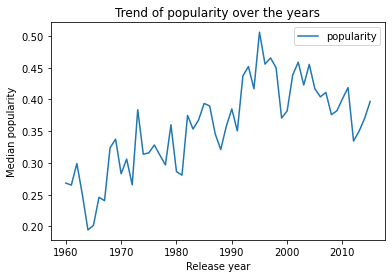

In [68]:
# I believe that generating a plot with the average over the years answers that question.
df.groupby(['release_year']).agg({'popularity': 'median'}).plot()
plt.xlabel('Release year')
plt.ylabel('Median popularity')
plt.title('Trend of popularity over the years')
plt.show()

> A clear upward trend

#### Question 4: How are revenues trending over time?

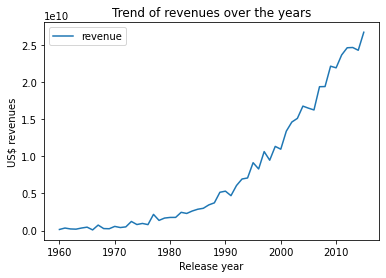

In [69]:
# I believe that generating a plot with the average over the years answers that question.
df.groupby(['release_year']).agg({'revenue': 'sum'}).plot()
plt.xlabel('Release year')
plt.ylabel('US$ revenues')
plt.title('Trend of revenues over the years')
plt.show()

> A clear upward trend.

#### Question 5: How is runtime trending over time?

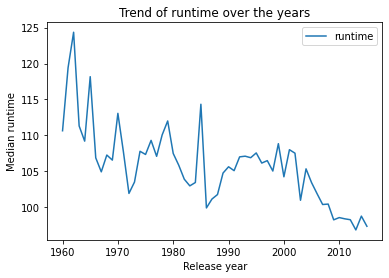

In [70]:
# I believe that generating a plot with the average over the years answers that question.
df.groupby(['release_year']).agg({'runtime': 'mean'}).plot()
plt.xlabel('Release year')
plt.ylabel('Median runtime')
plt.title('Trend of runtime over the years')
plt.show()

> A clear downward trend.

#### Question 6: Do top ratings movies always generate big revenue?

In [71]:
df.head(2)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,month
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,6
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,5


In [72]:
df[['vote_average', 'revenue']].describe()

,vote_average,revenue
count,10842.000000,1.084200e+04
mean,5.974064,3.991138e+07
std,0.934257,1.171179e+08
min,1.500000,0.000000e+00
25%,5.400000,0.000000e+00
50%,6.000000,0.000000e+00
75%,6.600000,2.414118e+07
max,9.200000,2.781506e+09


In [73]:
df_revenue = df.groupby(['original_title']).agg({'vote_average': 'mean',
                                                 'revenue': 'sum'}).sort_values('vote_average', ascending=False)
df_revenue.head(10)

,vote_average,revenue
original_title,,
The Story of Film: An Odyssey,9.2,0
The Mask You Live In,8.9,0
Black Mirror: White Christmas,8.8,0
Life Cycles,8.8,0
Pink Floyd: Pulse,8.7,0
Opeth: In Live Concert At The Royal Albert Hall,8.6,0
John Mayer: Where the Light Is Live in Los Angeles,8.5,0
The Art of Flight,8.5,0
A Personal Journey with Martin Scorsese Through American Movies,8.5,0


> It is clear that the high average vote does not mean high revenues. In the table I grouped the films by the highest average of votes.

#### Question 7: Do higher budget movies always generate big revenue?

In [74]:
df[['budget', 'revenue']].describe()

,budget,revenue
count,1.084200e+04,1.084200e+04
mean,1.465531e+07,3.991138e+07
std,3.093971e+07,1.171179e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,1.500000e+07,2.414118e+07
max,4.250000e+08,2.781506e+09


In [75]:
# the top 10 films with higher budgets and their revenues
df_budget = df.groupby(['original_title']).agg({'budget': 'sum',
                                                 'revenue': 'sum'}).sort_values('budget', ascending=False).head(10)

# the top 10 films with the highest revenues and their budgets
df_revenue = df.groupby(['original_title']).agg({'budget': 'sum',
                                                 'revenue': 'sum'}).sort_values('revenue', ascending=False).head(10)

df_budget.head(10), df_revenue.head(10)

(                                                budget     revenue
 original_title                                                    
 The Warrior's Way                            425000000    11087569
 Pirates of the Caribbean: On Stranger Tides  380000000  1021683000
 Pirates of the Caribbean: At World's End     300000000   961000000
 Godzilla                                     290000000   908090363
 Avengers: Age of Ultron                      280000000  1405035767
 The Avengers                                 280000000  1568080742
 Superman Returns                             270000000   391081192
 Tangled                                      260000000   591794936
 John Carter                                  260000000   284139100
 Spider-Man 3                                 258000000   890871626,
                                                  budget     revenue
 original_title                                                     
 Avatar                                      

In [76]:
df_budget.revenue.sum(), df_revenue.revenue.sum()

(8032864295, 16508155624)

> When comparing the tables above, it is clear that high budgets are not certain that there will be high revenues. Above, the comparative sum of the two tables. It is clear that the table with high revenues from films had smaller budgets.

#### Question 8: Is there any impact of vote count on revenue?

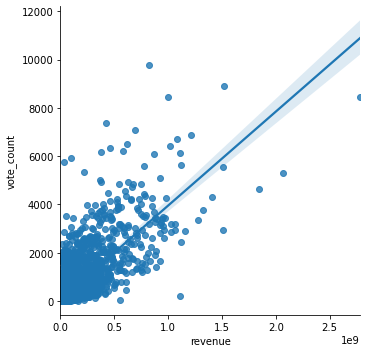

In [77]:
import seaborn as sns

# generating a trendline plot
sns.lmplot(x="revenue", y="vote_count", data=df)

> There is a positive impact on the relationship between revenue and vote_count.

#### Question 9: What are typical runtimes for directors? Is there a duration preferred by directors?

In [78]:
# number of films and their respective times
# 546 movies had a time of 90 minutes
df.runtime.value_counts().head(15)

90.0     576
95.0     358
100.0    333
93.0     328
97.0     306
96.0     299
91.0     297
94.0     292
98.0     270
88.0     269
92.0     269
89.0     253
105.0    249
101.0    232
99.0     231
Name: runtime, dtype: int64

In [79]:
df.runtime.value_counts().head(15).sum()

4562

> According to the table made with value_counts () between 4,532 films are in the range of 90 to 101 minutes in length, typical runtime for directors. The time preferred by the directors is 90 minutes.

#### Question 10: Is there a relation between popularity and revenue for directors? etc.

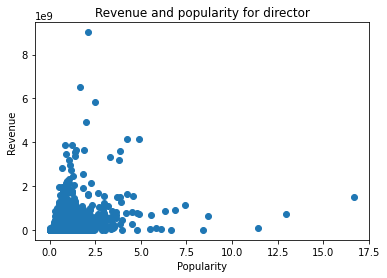

In [80]:
# using group by () to group as recipes and popularity by director
df_director = df.groupby(['director']).agg({'popularity': 'median',
                                            'revenue': 'sum'}).sort_values('popularity', ascending=False)

# generating a scatterplot to see the revenue and popularity ratio for directors
plt.scatter(df_director.popularity, df_director.revenue)
plt.title('Revenue and popularity for director')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

> Through the graph it is notorious that there is no relationship between high revenues and popularity by director. Popularity is well concentrated at 4.0 using the median, with revenues of up to 400 thousand.